In [51]:
import pandas as pd
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
%matplotlib inline

In [2]:
movers = pd.read_csv('../data/moves_w_dists.csv')

In [5]:
%%time 
shape, loc, scale = stats.lognorm.fit(movers['distance'])

CPU times: user 3min 37s, sys: 212 ms, total: 3min 37s
Wall time: 18.2 s


In [28]:
print(shape, loc, scale)

1.365862346724133 -210.88189746282245 6641.980137064779


In [29]:
np.log(scale)

8.801165411427068

In [37]:
x=np.linspace(0,250000,20000)
pdf_fitted = stats.lognorm.pdf(x, shape, loc=loc, scale=scale)

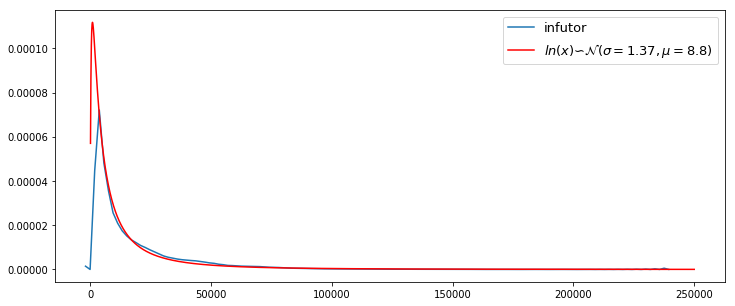

In [38]:
fig, ax = plt.subplots(figsize=(12,5))
data = movers['distance']
sns.kdeplot(data, ax=ax, label='infutor')
ax.plot(x,pdf_fitted,'r-', label=r'$ln(x) \backsim \mathcal{N}(\sigma=1.37, \mu=8.8)$')
ax.legend(fontsize=13)

In [40]:
cdf_fitted = stats.lognorm.cdf(x, shape, loc=loc, scale=scale)

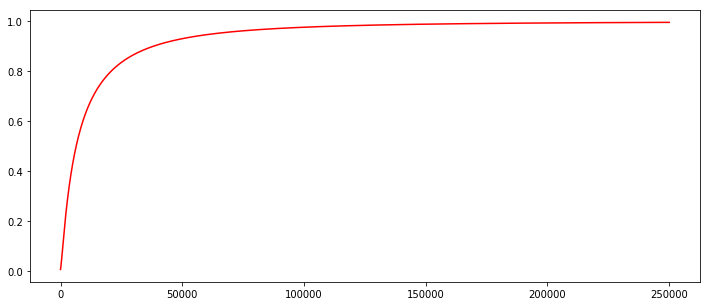

In [41]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(x, cdf_fitted,'r-', label=r'$ln(x) \backsim \mathcal{N}(\sigma=1.37, \mu=8.8)$')

In [42]:
skims = pd.read_csv('/home/max/projects/ual_model_workspace/fall-2018-models/data/WLCM_interaction_terms_dist.csv')

In [46]:
skims.rename(columns={'zone_id_home': 'zone_id_home1', 'zone_id_work': 'zone_id_home2'}, inplace=True)

In [48]:
skims.head()

,zone_id_home1,zone_id_home2,dist_da,dist_walk
0,1,1,0.12,0.12
1,1,2,0.24,0.24
2,1,3,0.44,0.44
3,1,4,0.41,0.41
4,1,5,0.68,0.68


In [50]:
skims['zone_id_home1'].unique()

array([   1,    2,    3, ..., 1452, 1453, 1454])

In [52]:
taz = gpd.read_file('/home/max/projects/infutor/data/Transportation_Analysis_Zones.shp')

In [67]:
taz['geometry'] = taz.centroid

In [68]:
taz['key'] = 1

In [69]:
taz_cart_df = pd.merge(taz[['taz1454', 'geometry', 'key']], taz[['taz1454','geometry', 'key']], on='key')

In [70]:
taz_cart_df['distance']

,taz1454_x,geometry_x,key,taz1454_y,geometry_y
0,566,POINT (-121.8576467424699 37.28927060084754),1,566,POINT (-121.8576467424699 37.28927060084754)
1,566,POINT (-121.8576467424699 37.28927060084754),1,565,POINT (-121.8533379635371 37.27758214291228)
2,566,POINT (-121.8576467424699 37.28927060084754),1,573,POINT (-121.8155788471425 37.29462625606124)
3,566,POINT (-121.8576467424699 37.28927060084754),1,571,POINT (-121.8156464942156 37.28068244491108)
4,566,POINT (-121.8576467424699 37.28927060084754),1,576,POINT (-121.8326348863136 37.31193308346154)
5,566,POINT (-121.8576467424699 37.28927060084754),1,575,POINT (-121.8290238729776 37.30473585339676)
6,566,POINT (-121.8576467424699 37.28927060084754),1,567,POINT (-121.8481475276746 37.2991916500953)
7,566,POINT (-121.8576467424699 37.28927060084754),1,570,POINT (-121.8299136926341 37.28057170239249)
8,566,POINT (-121.8576467424699 37.28927060084754),1,583,POINT (-121.8145610065138 37.32021915203784)
9,566,POINT (-121.8576467424699 37.28927060084754),1,584,POINT (-121.8221579450415 37.33177368894113)
